<a href="https://colab.research.google.com/github/ArthAgrawal/Brain-Tumor-Research-Paper/blob/main/ResNet_101_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd

In [3]:
dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_44'

img_height, img_width = 224, 224
batch_size = 32

def get_image_paths_and_labels(base_path):
    labels = []
    paths = []
    class_names = sorted(os.listdir(base_path))

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(base_path, class_name)
        for img_name in os.listdir(class_folder):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_folder, img_name)
                paths.append(img_path)
                labels.append(label)

    return paths, labels, class_names

image_paths, labels, class_names = get_image_paths_and_labels(dataset_folder_path)
labels = np.array(labels)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

train_df = pd.DataFrame({'filename': X_train, 'class': y_train})
val_df = pd.DataFrame({'filename': X_val, 'class': y_val})
test_df = pd.DataFrame({'filename': X_test, 'class': y_test})

train_df['class'] = train_df['class'].apply(lambda x: class_names[x])
val_df['class'] = val_df['class'].apply(lambda x: class_names[x])
test_df['class'] = test_df['class'].apply(lambda x: class_names[x])

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

print(f"Class names: {class_names}")

Found 910 validated image filenames belonging to 15 classes.
Found 228 validated image filenames belonging to 15 classes.
Found 285 validated image filenames belonging to 15 classes.
Class names: ['Astrocitoma T1', 'Carcinoma T1', 'Ependimoma T1', 'Ganglioglioma T1', 'Germinoma T1', 'Glioblastoma T1', 'Granuloma T1', 'Meduloblastoma T1', 'Meningioma T1', 'Neurocitoma T1', 'Oligodendroglioma T1', 'Papiloma T1', 'Schwannoma T1', 'Tuberculoma T1', '_NORMAL T1']


In [4]:
from collections import Counter

def check_split_distribution(labels):
    return Counter(labels)

train_dist = check_split_distribution(y_train)
val_dist = check_split_distribution(y_val)
test_dist = check_split_distribution(y_test)

print("Class distribution in the training set:")
for class_index, count in train_dist.items():
    print(f"Class {class_index}: {count} images")

print("\nClass distribution in the validation set:")
for class_index, count in val_dist.items():
    print(f"Class {class_index}: {count} images")

print("\nClass distribution in the test set:")
for class_index, count in test_dist.items():
    print(f"Class {class_index}: {count} images")


Class distribution in the training set:
Class 9: 83 images
Class 5: 35 images
Class 8: 174 images
Class 14: 161 images
Class 6: 19 images
Class 4: 18 images
Class 12: 94 images
Class 0: 113 images
Class 10: 55 images
Class 13: 18 images
Class 1: 42 images
Class 11: 42 images
Class 3: 13 images
Class 2: 29 images
Class 7: 14 images

Class distribution in the validation set:
Class 8: 43 images
Class 2: 7 images
Class 0: 28 images
Class 12: 24 images
Class 9: 21 images
Class 14: 40 images
Class 6: 5 images
Class 10: 14 images
Class 11: 11 images
Class 5: 9 images
Class 1: 11 images
Class 4: 4 images
Class 13: 4 images
Class 7: 4 images
Class 3: 3 images

Class distribution in the test set:
Class 8: 55 images
Class 9: 26 images
Class 1: 13 images
Class 14: 50 images
Class 11: 13 images
Class 10: 17 images
Class 13: 6 images
Class 7: 5 images
Class 12: 30 images
Class 0: 35 images
Class 2: 9 images
Class 6: 6 images
Class 5: 11 images
Class 4: 5 images
Class 3: 4 images


In [5]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Oct 23 19:24:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


In [7]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet101

# Best hyperparameters found
best_layers = [512, 256, 128]
best_batch_size = 64
best_learning_rate = 0.001

def create_model():
    base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False  # Freezing the base model layers

    x = base_model.output
    x = Flatten()(x)

    for nodes in best_layers:
        x = Dense(nodes, activation='relu')(x)
        x = BatchNormalization()(x)

    predictions = Dense(15, activation='softmax', dtype='float32')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model()
model.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

start_time = time.time()
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=best_batch_size,
    callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()

training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 94,208,655 (359.38 MB)

 Trainable params: 51,548,687 (196.64 MB)

 Non-trainable params: 42,659,968 (162.73 MB)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 715s 20s/step - accuracy: 0.3269 - loss: 2.3561 - val_accuracy: 0.0482 - val_loss: 21.2445 - learning_rate: 0.0010
Epoch 2/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.6471 - loss: 1.1090 - val_accuracy: 0.0307 - val_loss: 14.2865 - learning_rate: 0.0010
Epoch 3/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.8557 - loss: 0.6104 - val_accuracy: 0.0351 - val_loss: 10.8490 - learning_rate: 0.0010
Epoch 4/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.8973 - loss: 0.4354 - val_accuracy: 0.0482 - val_loss: 7.8674 - learning_rate: 0.0010
Epoch 5/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.9321 - loss: 0.2931 - val_accuracy: 0.0921 - val_loss: 5.9145 - learning_rate: 0.0010
Epoch 6/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.9681 - loss: 0.1908 - val_accuracy: 0.1579 - val_loss: 4.5538 - learning_rate: 0.0010
Epoch 7/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.9739 - loss: 0.1467 - val_accu

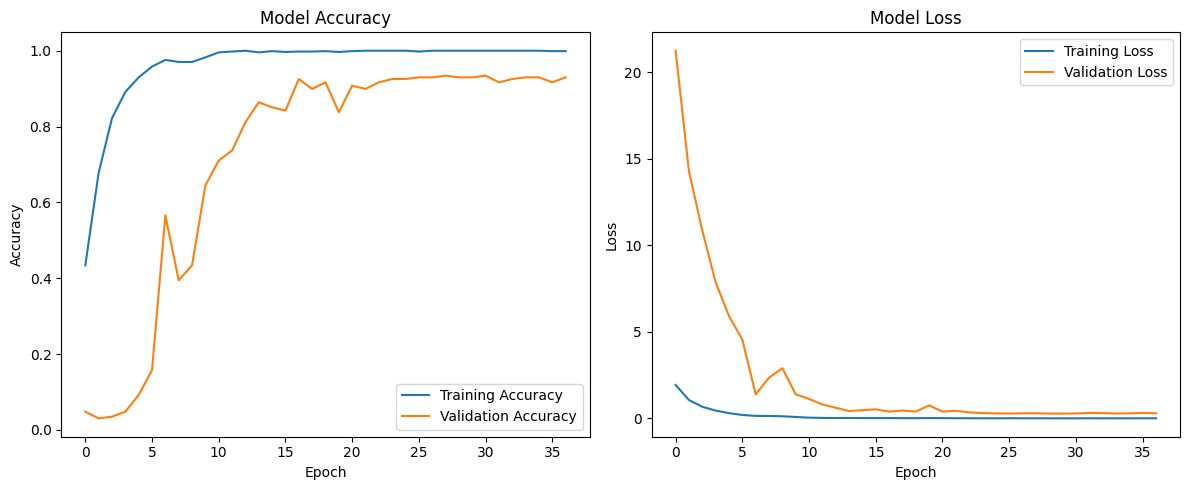

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 144s 18s/step - accuracy: 0.9352 - loss: 0.3077
Test Accuracy: 0.9368


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


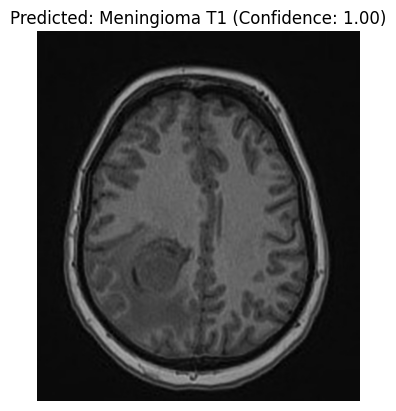

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path, target_size=(224, 224)):

    img = load_img(image_path, target_size=target_size)
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match model input (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (VGG16 specific)
    img_array = img_array / 255.0  # Normalizing the image
    return img_array

def predict_image(image_path, model, class_names):
    img_array = load_and_preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_prob = np.max(predictions)
    return class_names[predicted_class[0]], predicted_prob

def display_prediction(image_path, predicted_class, predicted_prob):
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} (Confidence: {predicted_prob:.2f})")
    plt.show()

image_path = '/content/drive/MyDrive/Brain_Tumor_44/Meningioma T1/0e7717a596ec7797ebea9a74c282960e67237f41ed71dd6528f4add050bb225d_big_gallery.jpeg'
class_names = ['Astrocitoma T1', 'Carcinoma T1', 'Ependimoma T1', 'Ganglioglioma T1', 'Germinoma T1',
               'Glioblastoma T1', 'Granuloma T1', 'Meduloblastoma T1', 'Meningioma T1', 'Neurocitoma T1',
               'Oligodendroglioma T1', 'Papiloma T1', 'Schwannoma T1', 'Tuberculoma T1', '_NORMAL T1']

predicted_class, predicted_prob = predict_image(image_path, model, class_names)
display_prediction(image_path, predicted_class, predicted_prob)

In [11]:
dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_Albumented_Balanced_Final2'

img_height, img_width = 224, 224
batch_size = 32

def get_image_paths_and_labels(base_path):
    labels = []
    paths = []
    class_names = sorted(os.listdir(base_path))

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(base_path, class_name)
        for img_name in os.listdir(class_folder):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_folder, img_name)
                paths.append(img_path)
                labels.append(label)

    return paths, labels, class_names

image_paths, labels, class_names = get_image_paths_and_labels(dataset_folder_path)
labels = np.array(labels)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

train_df = pd.DataFrame({'filename': X_train, 'class': y_train})
val_df = pd.DataFrame({'filename': X_val, 'class': y_val})
test_df = pd.DataFrame({'filename': X_test, 'class': y_test})

train_df['class'] = train_df['class'].apply(lambda x: class_names[x])
val_df['class'] = val_df['class'].apply(lambda x: class_names[x])
test_df['class'] = test_df['class'].apply(lambda x: class_names[x])

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

print(f"Class names: {class_names}")

Found 3840 validated image filenames belonging to 15 classes.
Found 960 validated image filenames belonging to 15 classes.
Found 1200 validated image filenames belonging to 15 classes.
Class names: ['Astrocitoma T1_augmented', 'Carcinoma T1_augmented', 'Ependimoma T1_augmented', 'Ganglioglioma T1_augmented', 'Germinoma T1_augmented', 'Glioblastoma T1_augmented', 'Granuloma T1_augmented', 'Meduloblastoma T1_augmented', 'Meningioma T1_augmented', 'Neurocitoma T1_augmented', 'Oligodendroglioma T1_augmented', 'Papiloma T1_augmented', 'Schwannoma T1_augmented', 'Tuberculoma T1_augmented', '_NORMAL T1_augmented']


In [12]:
from collections import Counter

def check_split_distribution(labels):
    return Counter(labels)

train_dist = check_split_distribution(y_train)
val_dist = check_split_distribution(y_val)
test_dist = check_split_distribution(y_test)

print("Class distribution in the training set:")
for class_index, count in train_dist.items():
    print(f"Class {class_index}: {count} images")

print("\nClass distribution in the validation set:")
for class_index, count in val_dist.items():
    print(f"Class {class_index}: {count} images")

print("\nClass distribution in the test set:")
for class_index, count in test_dist.items():
    print(f"Class {class_index}: {count} images")


Class distribution in the training set:
Class 3: 256 images
Class 9: 256 images
Class 13: 256 images
Class 1: 256 images
Class 10: 256 images
Class 8: 256 images
Class 11: 256 images
Class 12: 256 images
Class 2: 256 images
Class 4: 256 images
Class 0: 256 images
Class 14: 256 images
Class 7: 256 images
Class 5: 256 images
Class 6: 256 images

Class distribution in the validation set:
Class 9: 64 images
Class 13: 64 images
Class 4: 64 images
Class 11: 64 images
Class 2: 64 images
Class 14: 64 images
Class 6: 64 images
Class 5: 64 images
Class 10: 64 images
Class 3: 64 images
Class 8: 64 images
Class 7: 64 images
Class 12: 64 images
Class 0: 64 images
Class 1: 64 images

Class distribution in the test set:
Class 1: 80 images
Class 10: 80 images
Class 6: 80 images
Class 9: 80 images
Class 11: 80 images
Class 2: 80 images
Class 12: 80 images
Class 3: 80 images
Class 13: 80 images
Class 8: 80 images
Class 5: 80 images
Class 4: 80 images
Class 14: 80 images
Class 7: 80 images
Class 0: 80 im

In [14]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet101

# Best hyperparameters found
best_layers = [512, 256, 128]
best_batch_size = 64
best_learning_rate = 0.001

def create_model():
    base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False  # Freezing the base model layers

    x = base_model.output
    x = Flatten()(x)

    for nodes in best_layers:
        x = Dense(nodes, activation='relu')(x)
        x = BatchNormalization()(x)

    predictions = Dense(15, activation='softmax', dtype='float32')(x)

    model2 = Model(inputs=base_model.input, outputs=predictions)
    model2.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model2

model2 = create_model()
model2.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

start_time = time.time()
history = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=best_batch_size,
    callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()

training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 94,208,655 (359.38 MB)

 Trainable params: 51,548,687 (196.64 MB)

 Non-trainable params: 42,659,968 (162.73 MB)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 3489s 28s/step - accuracy: 0.3937 - loss: 2.0838 - val_accuracy: 0.1063 - val_loss: 6.7572 - learning_rate: 0.0010
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 200ms/step - accuracy: 0.7229 - loss: 0.9815 - val_accuracy: 0.2969 - val_loss: 2.5096 - learning_rate: 0.0010
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 24s 196ms/step - accuracy: 0.8018 - loss: 0.7069 - val_accuracy: 0.3906 - val_loss: 2.6804 - learning_rate: 0.0010
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 24s 193ms/step - accuracy: 0.8400 - loss: 0.5403 - val_accuracy: 0.6229 - val_loss: 1.2824 - learning_rate: 0.0010
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.8622 - loss: 0.4480 - val_accuracy: 0.5604 - val_loss: 1.6038 - learning_rate: 0.0010
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 24s 192ms/step - accuracy: 0.8826 - loss: 0.3998 - val_accuracy: 0.6031 - val_loss: 1.6859 - learning_rate: 0.0010
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.8907 - loss:

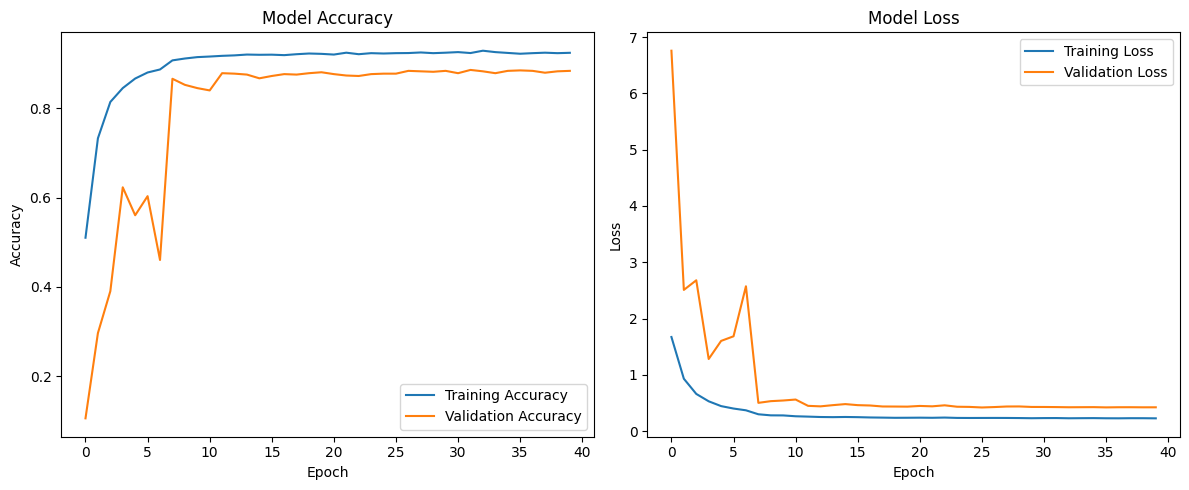

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [16]:
test_loss, test_acc = model2.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 817s 22s/step - accuracy: 0.9080 - loss: 0.3444
Test Accuracy: 0.8950


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


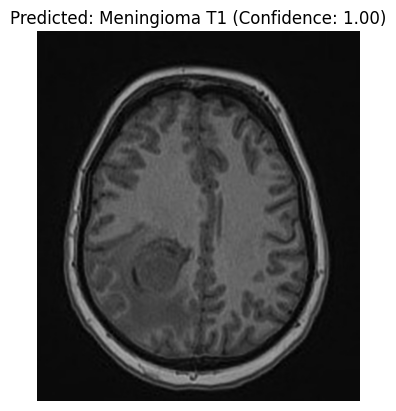

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path, target_size=(224, 224)):

    img = load_img(image_path, target_size=target_size)
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match model input (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (VGG16 specific)
    img_array = img_array / 255.0  # Normalizing the image
    return img_array

def predict_image(image_path, model, class_names):
    img_array = load_and_preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_prob = np.max(predictions)
    return class_names[predicted_class[0]], predicted_prob

def display_prediction(image_path, predicted_class, predicted_prob):
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} (Confidence: {predicted_prob:.2f})")
    plt.show()

image_path = '/content/drive/MyDrive/Brain_Tumor_44/Meningioma T1/0e7717a596ec7797ebea9a74c282960e67237f41ed71dd6528f4add050bb225d_big_gallery.jpeg'
class_names = ['Astrocitoma T1', 'Carcinoma T1', 'Ependimoma T1', 'Ganglioglioma T1', 'Germinoma T1',
               'Glioblastoma T1', 'Granuloma T1', 'Meduloblastoma T1', 'Meningioma T1', 'Neurocitoma T1',
               'Oligodendroglioma T1', 'Papiloma T1', 'Schwannoma T1', 'Tuberculoma T1', '_NORMAL T1']

predicted_class, predicted_prob = predict_image(image_path, model2, class_names)
display_prediction(image_path, predicted_class, predicted_prob)